In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json
pd.options.display.max_colwidth = 200
from bs4 import BeautifulSoup
from datetime import datetime
import statsmodels.api as sm

# Analysis of WeRateDogs Tweet 

# 1. Gathering Data 

In [2]:
# load twitter-archive-enhanced.csv and show some data
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [3]:
# download file image-predictions.tsv
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# load image-predictions file
df_imagepredict = pd.read_csv('image-predictions.tsv', sep='\t')
df_imagepredict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


After seeing the json.txt tweet file through notepad, I had trouble seeing the file structure for each line. So I tried reading the first line from tweet-json.txt to see the structure each line.

In [5]:
# open tweet-json.txt and read first line
with open('tweet-json.txt') as file:
    first_line = file.readline()
first_line

'{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"med

In [6]:
# read tweet-json.txt each line, retrieve the tweet id , retweet count and favorite count data 
# and store the information in a dataset.
tweet_list = []
with open('tweet-json.txt') as file:
    lines = file.readlines()
    for line in lines:
        line = json.loads(line)
        tweet_id = line['id']
        retweet_count = line['retweet_count']
        favorite_count = line['favorite_count']
        tweet_list.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})
    
df_tweet = pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [7]:
# show first 5 data
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# 2. Assessing Data

In [8]:
#show first 5 data df_twitter
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


The 'source' data still has an html tag. Empty data in the name, doggo, floofer, pupper, and puppo columns are given the string value 'None'.

In [9]:
# take 5 data samples from df_twitter
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
704,785872687017132033,NaN,NaN,2016-10-11 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Rusty. He appears to be rather h*ckin fluffy. Also downright adorable af. 12/10 would rub my face against his https://t.co/1j9kLGb4wV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785872687017132033/video/1,12,10,Rusty,None,None,None,None
991,748699167502000129,NaN,NaN,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tripp. He's being eaten by a sherk and doesn't even care. Unfazed af. 11/10 keep doin you Tripp https://t.co/gGxjthmG1c,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/748699167502000129/photo/1,https://twitter.com/dog_rates/status/748699167502000129/photo/1",11,10,Tripp,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @tallylott: h*ckin adorable promposal. 13/10 @dog_rates https://t.co/6n8hzNihJ9,8.609145e+17,363890752.0,2017-05-06 17:49:42 +0000,"https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,https://twitter.com/tallylott/status/860914485250469888/photo/1,http...",13,10,None,None,None,None,None
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Penny. Her tennis ball slowly rolled down her cone and into the pool. 8/10 bad things happen to good puppers https://t.co/YNWU7LeFgg,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/680583894916304897/photo/1,https://twitter.com/dog_rates/status/680583894916304897/photo/1,https://twitter.com/dog_rates/status/680583894916304897/photo/1,http...",8,10,Penny,None,None,None,None
1269,709519240576036864,NaN,NaN,2016-03-14 23:19:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Vince. He's a Gregorian Flapjeck. White spot on legs almost looks like another dog (whoa). 9/10 rad as hell https://t.co/aczGAV2dK4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709519240576036864/photo/1,9,10,Vince,None,None,None,None


In [10]:
#show number of row and columns
df_twitter.shape

(2356, 17)

In [11]:
#show the number of data and data type for each column
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# show statistic summary
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# count the amount of duplicate data
sum(df_twitter.duplicated())

0

In [14]:
# show the unique values of the rating_numerator and rating_denominator columns
print(df_twitter.rating_numerator.unique())
print()
print(df_twitter.rating_denominator.unique())

[  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]

[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


the maximum value of rating_numerator and rating_denominator are very large. In addition, the value of 0 in the rating_numerator rating_denominator must be checked further.

'The Twitter account We Rate Dogs (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses, often giving them scores above 10/10.' source: https://knowyourmeme.com/memes/theyre-good-dogs-brent.

Based on that information the denominator rating should be 10

In [15]:
# check data that has deniminator other than 10
df_twitter[df_twitter.rating_denominator != 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None


data that has a denominator other than the value of 10 some have very large numerators such as 84, 100, etc.

In [16]:
# check the number of data that has a denominator other than 10
df_twitter[df_twitter.rating_denominator != 10].shape[0]

23

In [17]:
# see the contents of the text column of data that has a denominator other than 10
df_twitter[df_twitter.rating_denominator != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


Data that has a deniminator other than 10 is caused by:
- WeRateDog sometimes gives ratings with more than 10 denominators such as 84/70 and 165/150. But this value can be simplified to 12/10 and 11/10, so that it has a denominator of 10.
- Error extracting rating. There is more than one pair of numbers that are bounded by the '/' symbol, which causes an extract error.

In [18]:
# see the number of data that has a numerator rating of more than 20
df_twitter[df_twitter.rating_numerator > 20].shape[0]

24

In [19]:
# show data that has a numerator rating of more than 20
df_twitter[df_twitter.rating_numerator > 20][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


In [20]:
df_twitter[(df_twitter.rating_numerator > 20) & (df_twitter.rating_denominator == 10)][['text', 'rating_numerator']]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420


In data that has a numerator rating> 20 and denominator rating = 10 there are some errors in extracting numerators that have fractions. For example, the numerator rating should be 9.75 but the stored numerator value is 75 (the number behind the dot).

In [21]:
# see the unique values of the doggo, floofer, pupper, and puppo columns
print(df_twitter.doggo.unique())
print(df_twitter.floofer.unique())
print(df_twitter.pupper.unique())
print(df_twitter.puppo.unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


In [22]:
empty_stage = df_twitter[(df_twitter.doggo == 'None') & (df_twitter.floofer == 'None') & 
                         (df_twitter.pupper == 'None') & (df_twitter.puppo == 'None')]
empty_stage['text']

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

Lines that do not have a stage are caused because the tweet post does not mention the dog stage being posted.

In [23]:
# count the number of stages
df_twitter['stage_count'] = df_twitter['doggo'].apply(lambda x: 0 if x=='None' else 1) + df_twitter['floofer'].apply(
    lambda x: 0 if x=='None' else 1) + df_twitter['pupper'].apply(lambda x: 0 if x=='None' else 1) + df_twitter['puppo'].apply(
    lambda x: 0 if x=='None' else 1) 
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,0


In [24]:
# check the unique value of the stage_count
df_twitter.stage_count.unique()

array([0, 1, 2], dtype=int64)

it turns out there are data that have more than 1 stage

In [25]:
# show number of data that has more than 1 stage
df_twitter[df_twitter.stage_count > 1].shape

(14, 18)

In [26]:
# check the contents of the text column of data that has more than 1 stage_count
df_twitter[df_twitter.stage_count > 1][['text', 'doggo', 'floofer', 'pupper', 'puppo']]

,text,doggo,floofer,pupper,puppo
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,None,pupper,None
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,None,pupper,None
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None


data has more than 1 stage, almost all of them are caused because there are indeed more than one dog given a rating in the tweet.

In [27]:
# show unique value of name column
df_twitter.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

There are strange names, such as 'None', 'such', 'a', 'quite', 'not', 'one', 'mad', 'an', 'very', 'his', 'this', 'all, and others

In [28]:
# show the contents of the text column of data that has the column name value 'None'
df_twitter[df_twitter.name == 'None'].text

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7                           When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12                                      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24                                                        You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25               This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
                                                                                       ...                                                       

Data that has the contents of the name column is 'None' because there is no mention of the dog's name in the tweet

In [29]:
# check the data where the contents of the name column are the lower case
df_twitter[df_twitter.name.str[0].str.islower()][['text', 'name']].head(20)

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
118,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
682,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad


Almost all of the wrong names are caused by not mentioning the dog's name in the tweet post, while the program still tries to extract the name so that it gets the wrong name.

In [30]:
# show first 5 data
df_imagepredict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


column names do not describe the contents of the data

In [31]:
# #show the number of data and data type for each column
df_imagepredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
# show statistic summary
df_imagepredict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
# count the amount of duplicate data
sum(df_imagepredict.duplicated())

0

In [34]:
# show unique value
print(df_imagepredict.img_num.unique())
print(df_imagepredict.p1_dog.unique())
print(df_imagepredict.p2_dog.unique())
print(df_imagepredict.p3_dog.unique())

[1 4 2 3]
[ True False]
[ True False]
[ True False]


In [35]:
# show first 5 data 
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [36]:
# #show the number of data and data type for each column
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [37]:
# show statistic summary
df_tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [38]:
# count the amount of duplicate data
sum(df_tweet.duplicated())

0

#### Quality
* df_twitter:
        - There is an html tag in the source column
        - Empty data in the name, doggo, floofer, pupper, and puppo columns are given the string value 'None' not NaN
        - Tweet_id of type int, it should be a string
        - The timestamp and retweeted_status_timestamp columns are of type string data, it should be datetime
        - There is a rating_denominator with value other than 10
        - There is a value 'None' in the name column, it should be changed to NaN
        - Change the wrong name beginning with the lower case in the name column like 'such', 'a', 'quite', and others with NaN
* df_imagepredict:
        - the tweet_id column is type int, it should be a string
        - change the column names p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, to predict1, predict1_confident, predict1_dog and so on.
        
#### Tidiness
    - The jpg_url and img_num columns of df_imagepredict should be a dataset with df_twitter
    - df_tweet with df_twitter should be combined into one dataset

# Cleaning Data

In [39]:
# copy data
df_twitter2 = df_twitter.copy()
df_imagepredict2 = df_imagepredict.copy()
df_tweet2 = df_tweet.copy()

## df_twitter2 dataset

#### define
change the timestamp and retweeted_status_timestamp data types to datetime

#### code

In [40]:
# change the timestamp and retweeted_status_timestamp data types to datetime
df_twitter2['timestamp'] = pd.to_datetime(df_twitter2['timestamp'])
df_twitter2['retweeted_status_timestamp'] = pd.to_datetime(df_twitter2['retweeted_status_timestamp'])

#### test

In [41]:
# show the data types of each column
df_twitter2.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp    datetime64[ns, UTC]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
stage_count                                 int64
dtype: object

#### define
change the tweet_id column data type to a string

#### code

In [42]:
df_twitter2['tweet_id'] = df_twitter2.tweet_id.astype(str)

#### test

In [43]:
df_twitter2.tweet_id.dtypes

dtype('O')

the tweet_id column data type has been successfully converted to a string

#### define
remove the html tag in the source column

#### code

In [44]:
# show unique value
df_twitter2.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [45]:
df_twitter2['source'] = df_twitter2.source.apply(lambda x: x.split('\"')[1])

#### test

In [46]:
df_twitter2.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,0


In [47]:
df_twitter2.source.unique()

array(['http://twitter.com/download/iphone', 'http://twitter.com',
       'http://vine.co', 'https://about.twitter.com/products/tweetdeck'],
      dtype=object)

there is no html tag in the source column

#### define
replace 'None' data in the doggo, floofer, pupper, and puppo columns with np.nan

#### code

In [48]:
df_twitter2[(df_twitter2.doggo == 'None') | (df_twitter2.floofer == 'None') | (df_twitter2.pupper == 'None') | (df_twitter2.puppo == 'None')].shape

(2356, 18)

the number of rows that have 'None' data in the doggo, floofer, pupper and puppo columns is 2356 rows

In [49]:
# show unique values of doggo, floofer, pupper, and puppo columns
print(df_twitter2.doggo.unique())
print(df_twitter2.floofer.unique())
print(df_twitter2.pupper.unique())
print(df_twitter2.puppo.unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


There is a value of 'None' at each stage

In [50]:
df_twitter2[['doggo', 'floofer', 'pupper', 'puppo']] = df_twitter2[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.nan)

#### test

In [51]:
df_twitter2[(df_twitter2.doggo == 'None') | (df_twitter2.floofer == 'None') | (df_twitter2.pupper == 'None') | (df_twitter2.puppo == 'None')].shape

(0, 18)

There is no 'None' data in the doggo, floofer, pupper and puppo columns

In [52]:
# show unique values of doggo, floofer, pupper, and puppo columns
print(df_twitter2.doggo.unique())
print(df_twitter2.floofer.unique())
print(df_twitter2.pupper.unique())
print(df_twitter2.puppo.unique())

[nan 'doggo']
[nan 'floofer']
[nan 'pupper']
[nan 'puppo']


'None' has changed to nan

In [53]:
df_twitter2.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN,0


#### define
change the rating_numerator and rating_denominator column values from data that have a rating_denominator column other than 10 to NaN
#### code

In [54]:
df_twitter2[(df_twitter2.rating_denominator != 10)].shape

(23, 18)

the number of data that has a denominator rating other than ten is 23

In [55]:
df_twitter2.loc[df_twitter2.rating_denominator != 10, 
       ['rating_numerator', 'rating_denominator']] = None

#### test

In [56]:
df_twitter2[(df_twitter2.rating_denominator != 10)].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,http://twitter.com/download/iphone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaT,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50+00:00,http://twitter.com/download/iphone,@docmisterio account started on 11/15/15,NaN,NaN,NaT,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,http://twitter.com/download/iphone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaT,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",NaN,NaN,None,NaN,NaN,NaN,NaN,0
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,http://twitter.com/download/iphone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaT,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",NaN,NaN,Sam,NaN,NaN,NaN,NaN,0
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06+00:00,http://twitter.com/download/iphone,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38+00:00,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",NaN,NaN,None,NaN,NaN,NaN,NaN,0


rating_numerator and rating_denominator have changed to NaN

In [57]:
df_twitter2[(df_twitter2.rating_numerator.isna()) | (df_twitter2.rating_denominator.isna())].shape[0]

23

the number of NaN data in the rating_numerator column or the rating_denominator column is the same as the number of data that has a rating_denominator other than 10

#### define
Change the wrong name beginning with the lower case in the name column like 'such', 'a', 'quite', and others with NaN
#### code

In [58]:
# save data that has a name starting with lower case into the wrong_name variable
wrong_name = df_twitter2[df_twitter2.name.str[0].str.islower()]

In [59]:
wrong_name.name.shape[0]

109

the number of wrong_name data is 109

In [60]:
for item in wrong_name.name.unique():
    df_twitter2.name = df_twitter2.name.replace(item, np.nan)

#### test

In [61]:
wrong_name.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,http://twitter.com/download/iphone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10.0,such,NaN,NaN,NaN,NaN,0
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,http://twitter.com/download/iphone,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaT,https://twitter.com/dog_rates/status/881536004380872706/video/1,14.0,10.0,a,NaN,NaN,pupper,NaN,1


the data in the name column has changed to NaN

In [62]:
df_twitter2[df_twitter2.name.isna()].shape[0]

109

the number of empty data in the name column is the same as the number of data in the name column that starts with the lower case

#### define
change the value 'None' in the name column to NaN
#### code

In [63]:
df_twitter2[df_twitter2.name == 'None'].shape[0]

745

In [64]:
df_twitter2[df_twitter2.name.isna()].shape[0]

109

In [65]:
df_twitter2[df_twitter2.name == 'None'].shape[0] + df_twitter2[df_twitter2.name.isna()].shape[0]

854

In [66]:
df_twitter2.name = df_twitter2.name.replace('None', np.nan)

#### test

In [67]:
df_twitter2[df_twitter2.name.isna()].shape[0]

854

Empty data in the name column is now 854 data

#### define
retrieve data that has an original rating (no retweet)

#### code

In [68]:
df_twitter2.retweeted_status_id.shape[0]

2356

In [69]:
df_twitter2[df_twitter2.retweeted_status_id.isna()].shape[0]

2175

the number of data that has an original rating (no retweet) is 2175

In [70]:
df_twitter2 = df_twitter2[df_twitter2.retweeted_status_id.isna()].copy()

#### test

In [71]:
df_twitter2.shape

(2175, 18)

the number of data in the dataset becomes 2175 data

#### define
remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns
#### code

In [72]:
df_twitter2.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,0


In [73]:
# remove columns
df_twitter2.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                  'retweeted_status_timestamp'], inplace=True)

#### test

In [74]:
df_twitter2.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,0


in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp have been deleted successfully

## df_imagepredict dataset

#### define
change the tweet_id data type to be a string
#### code

In [75]:
df_imagepredict2.tweet_id = df_imagepredict2.tweet_id.astype(str)

#### test

In [76]:
df_imagepredict2.tweet_id.dtypes

dtype('O')

the tweet_id column data type has changed to a string

#### define
merge jpg_url and img_num columns into the df_twitter2 dataset
#### code

In [77]:
df_twitter_master = df_twitter2.merge(df_imagepredict2.loc[:,['tweet_id','jpg_url','img_num']],how='inner',on='tweet_id')

### test

In [78]:
df_twitter_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1


jpg_url and img_num have been successfully merged into df_twitter2

In [79]:
df_twitter_master.shape[0]

1994

#### define
remove the jpg_url and img_num columns
#### code

In [80]:
df_imagepredict2.drop(columns=['jpg_url', 'img_num'], inplace=True)

#### test

In [81]:
df_imagepredict2.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


jpg_url and img_num have been successfully removed

#### define
change the column names p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, to predict1, predict1_confident, predict1_dog and so on.
#### code

In [82]:
df_imagepredict2.rename(columns={'p1': 'predict1', 'p1_conf': 'predict1_confident', 'p1_dog': 'predict1_dog',
                                 'p2': 'predict2', 'p2_conf': 'predict2_confident', 'p2_dog': 'predict2_dog',
                                 'p3': 'predict3', 'p3_conf': 'predict3_confident', 'p3_dog': 'predict3_dog'}, inplace=True)

#### test

In [83]:
df_imagepredict2.head()

,tweet_id,predict1,predict1_confident,predict1_dog,predict2,predict2_confident,predict2_dog,predict3,predict3_confident,predict3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


column name changed successfully

In [84]:
df_imagepredict2.shape

(2075, 10)

#### define 
remove data where the tweet id is not present in the df_twitter_master dataset
#### code

In [85]:
df_twitter_master.shape

(1994, 15)

In [86]:
df_imagepredict2= df_imagepredict2.merge(df_twitter_master.loc[:,['tweet_id']], how='inner', on='tweet_id')

#### test

In [87]:
df_imagepredict2.shape

(1994, 10)

the number of df_imagepredict2 data is the same as the df_twitter_master dataset

In [88]:
# save data that has been cleaned into image-predictions-new.csv
df_imagepredict2.to_csv('image-predictions-new.csv')

## df_tweet dataset

#### define
change the tweet_id data type to be a string

#### code

In [89]:
# #show the number of data and data type for each column
df_tweet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [90]:
df_tweet2.tweet_id = df_tweet2.tweet_id.astype(str)

#### test

In [91]:
# show the number of data and data type for each column
df_tweet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


the tweet_id column data type has changed to a string

#### define
merge the tweet2 dataset to the df_twitter_master dataset

#### code

In [92]:
df_twitter_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1


In [93]:
df_twitter_master = df_twitter_master.merge(df_tweet2, how='left', on='tweet_id')

### test

In [94]:
df_twitter_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count,jpg_url,img_num,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6514,33819


the dataset has been successfully merged

In [95]:
df_twitter_master.shape

(1994, 17)

In [96]:
# save df_twitter_master into twitter_archive_master.csv
df_twitter_master.to_csv('twitter_archive_master.csv')

# Analyzing, and Visualizing Data

Question:
1. How is the distribution of retweet_cout and favorite_count?
2. Do the post times and post days affect the number of favorite_count?
3. What breed of dog appears most often in tweet posts based on first prediction?

In [97]:
df_twitter_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count,jpg_url,img_num,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6514,33819


In [98]:
df_imagepredict2.head()

,tweet_id,predict1,predict1_confident,predict1_dog,predict2,predict2_confident,predict2_dog,predict3,predict3_confident,predict3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


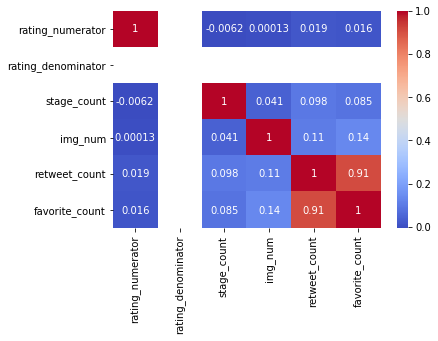

In [99]:
# look at the correlation between variables
sns.heatmap(df_twitter_master.corr(), cmap='coolwarm', annot=True)

## Question 1 : How is the distribution of retweet_cout and favorite_count?

In [100]:
#copy dataset
df_twitter_master2 = df_twitter_master.copy()

In [101]:
# # show statistic summary of retweet_count and favorite_count
df_twitter_master2[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,1994.000000,1994.000000
mean,2766.753260,8895.725677
std,4674.698447,12213.193181
min,16.000000,81.000000
25%,624.750000,1982.000000
50%,1359.500000,4136.000000
75%,3220.000000,11308.000000
max,79515.000000,132810.000000


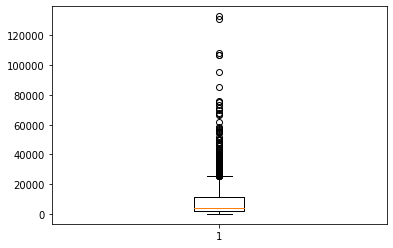

In [102]:
#melihat outlier
plt.boxplot(df_twitter_master2.favorite_count);

favorite_count data of more than 20000 is classified as outlier.

In [103]:
df_twitter_master2[df_twitter_master2.favorite_count > 20000].shape[0]

261

there are 261 outliers in the favorite_count column

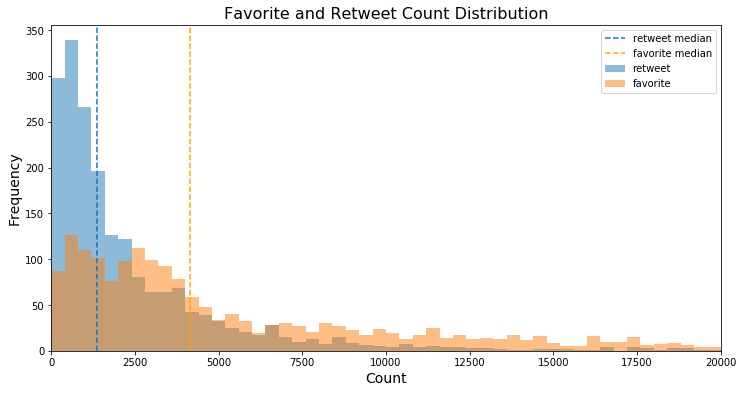

In [104]:
plt.figure(figsize=(12,6))
bins = np.arange(0, 133000 , 400)
plt.hist(df_twitter_master.retweet_count, alpha=0.5, bins=bins, label='retweet')
plt.hist(df_twitter_master.favorite_count, alpha=0.5, bins=bins, label='favorite')
plt.axvline(df_twitter_master2.retweet_count.median(), linestyle='--', label='retweet median')
plt.axvline(df_twitter_master2.favorite_count.median(), color='orange', linestyle='--', label='favorite median')
plt.xlim(0,20000)
plt.title('Favorite and Retweet Count Distribution', size=16)
plt.ylabel('Frequency', size=14)
plt.xlabel('Count', size=14)
plt.legend();

Most tweets on WeRateDogs have a retweet count of 1360 and a favorite count of 4136

### Question 2 : Do the post times and post days affect the number of favorite count and retweet count?

In [105]:
df_twitter_master3 = df_twitter_master2[['tweet_id', 'timestamp', 'retweet_count', 'favorite_count']].copy()

In [106]:
# see the minimum and maximum values from the timestamp column
df_twitter_master3.timestamp.min(), df_twitter_master3.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [107]:
# convert datetime into time (24 hours)
df_twitter_master3['time'] = df_twitter_master3['timestamp'].apply(lambda x: datetime.strftime(x, '%H'))

In [108]:
# convert datetime into dayname
df_twitter_master3['day'] = df_twitter_master3.timestamp.dt.day_name()

In [109]:
df_twitter_master3.head()

,tweet_id,timestamp,retweet_count,favorite_count,time,day
0,892420643555336193,2017-08-01 16:23:56+00:00,8853,39467,16,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,00,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,00,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,15,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,16,Saturday


In [110]:
# show the number of data and data type for each column
df_twitter_master3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1994 non-null   object             
 1   timestamp       1994 non-null   datetime64[ns, UTC]
 2   retweet_count   1994 non-null   int64              
 3   favorite_count  1994 non-null   int64              
 4   time            1994 non-null   object             
 5   day             1994 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 109.0+ KB


In [111]:
df_twitter_master3.time = df_twitter_master3.time.astype(int)

In [112]:
df_twitter_master3.day.unique()

array(['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday',
       'Wednesday'], dtype=object)

In [113]:
pd.get_dummies(df_twitter_master3.day)

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
1989,0,1,0,0,0,0,0
1990,0,1,0,0,0,0,0
1991,0,0,0,1,0,0,0
1992,0,0,0,1,0,0,0


In [114]:
# get dummies data
df_twitter_master3[['friday', 'monday', 'saturday', 'sunday', 
                    'thursday', 'tuesday', 'wednesday']] = pd.get_dummies(df_twitter_master3['day'])

In [115]:
# multiple regression
df_twitter_master3['intercept'] = 1
Y = df_twitter_master3['retweet_count']
X = df_twitter_master3[['intercept', 'friday', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday']]
logistic = sm.OLS(Y, X)
result = logistic.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5080
Date:                Fri, 17 Jul 2020   Prob (F-statistic):              0.803
Time:                        11:28:07   Log-Likelihood:                -19676.
No. Observations:                1994   AIC:                         3.937e+04
Df Residuals:                    1987   BIC:                         3.941e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3089.6263    271.455     11.382      0.000    2557.261    3621.992
friday      -305.2022    388.614     -0.785      0.432   -1067.335     456.931
monday      -453.1186    374.987     -1.208      0.227   -1188.527     282.289
saturday    -121.6739    400.667     -0.304      0.761    -907.445     664.097
sunday      -427.2239    398.970     -1.071      0.284   -1209.667     355.219
thursday    -563.6615    388.263     -1.452      0.147   -1325.107     197.784
tuesday     -370.0195    384.545     -0.962      0.336   -1124.173     384.134
==============================================================================
Omnibus:                     2474.429   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           398553.019
Skew:                           6.538   Prob(JB):                         0.00
Kurtosis:                      71.015   Cond. No.                         7.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
np.sqrt(0.002)

0.044721359549995794

dayname has a very small correlation to retweet count which is equal to 0.045

In [117]:
# multiple regression
Y = df_twitter_master3['favorite_count']
X = df_twitter_master3[['intercept', 'friday', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday']]
df_twitter_master3['intercept'] = 1
logistic2 = sm.OLS(Y, X)
result2 = logistic2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5713
Date:                Fri, 17 Jul 2020   Prob (F-statistic):              0.753
Time:                        11:28:08   Log-Likelihood:                -21591.
No. Observations:                1994   AIC:                         4.320e+04
Df Residuals:                    1987   BIC:                         4.324e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9965.3906    709.139     14.053      0.000    8574.656    1.14e+04
friday     -1266.4683   1015.201     -1.248      0.212   -3257.439     724.503
monday     -1462.1765    979.602     -1.493      0.136   -3383.332     458.979
saturday    -988.3787   1046.688     -0.944      0.345   -3041.100    1064.343
sunday     -1272.9335   1042.255     -1.221      0.222   -3316.961     771.094
thursday   -1626.1758   1014.286     -1.603      0.109   -3615.351     362.999
tuesday     -879.9770   1004.572     -0.876      0.381   -2850.103    1090.149
==============================================================================
Omnibus:                     1612.839   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43922.056
Skew:                           3.662   Prob(JB):                         0.00
Kurtosis:                      24.795   Cond. No.                         7.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
np.sqrt(0.002)

0.044721359549995794

dayname has a very small correlation to favorite count which is equal to 0.045

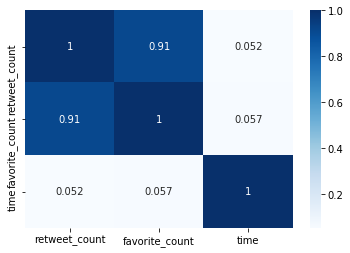

In [119]:
df_twitter_master4 = df_twitter_master3[['retweet_count', 'favorite_count', 'time']].copy()
sns.heatmap(df_twitter_master4.corr(), cmap='Blues', annot=True);

The day and time (24 hour) when a tweet in a post has a very small correlation with the favorite count and retweet count. Day and time have very little effect on favorite counts and retweet counts, and can even be said to have no effect.

## Question 3:	What breed appears most often in tweet tweets based on the first prediction?

In [120]:
df_imagepredict2.head()

,tweet_id,predict1,predict1_confident,predict1_dog,predict2,predict2_confident,predict2_dog,predict3,predict3_confident,predict3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [121]:
df_imagepredict3 = df_imagepredict2[df_imagepredict2.predict1_dog == True]

In [122]:
df_imagepredict3.shape

(1477, 10)

In [123]:
dog_breed = df_imagepredict3.predict1.value_counts().rename_axis('breed').reset_index(name='counts')[:10]
dog_breed

,breed,counts
0,golden_retriever,139
1,Labrador_retriever,95
2,Pembroke,88
3,Chihuahua,79
4,pug,54
5,chow,41
6,Samoyed,40
7,Pomeranian,38
8,toy_poodle,38
9,malamute,29


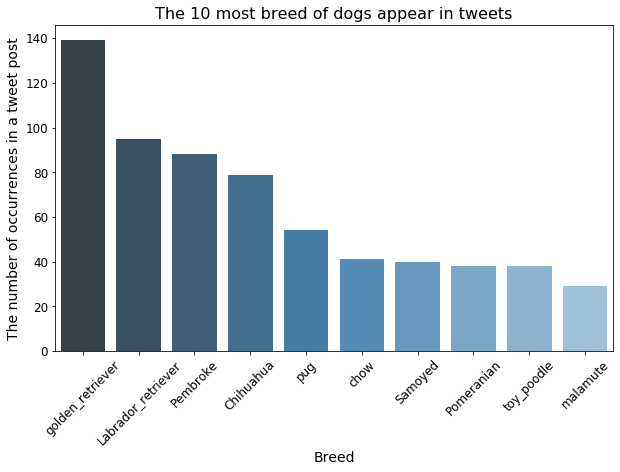

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(dog_breed.breed, dog_breed.counts, palette="Blues_d")
plt.xticks(rotation=45)
plt.title('The 10 most breed of dogs appear in tweets', size=16)
plt.ylabel('The number of occurrences in a tweet post', size=14)
plt.xlabel('Breed', size=14)
plt.xticks(size=12)
plt.yticks(size=12);

Based on the results of the first prediction of the type of dog that most often appears in the WeRateDogs post is the type of golden retrievers with the number of appearances as much as 150 times. While the second most often appears in a tweet that is labrador retriever with the number of appearances as much as 100 times.

### Source :
- https://github.com/stephani-marcelli-djojo/udacity-data-analytics/blob/master/project-4-wrangling/wrangle_act.ipynb
- https://www.dataquest.io/blog/python-datetime-tutorial/
- https://github.com/shravankoninti/Udacity_DataAnalyst/blob/master/Project-4%20-%20Data_Wrangling/act_report.ipynb
- https://stackoverflow.com/questions/50599934/removing-rows-from-dataframe-whose-first-letter-is-in-lowercase